In [25]:
import pyaudio
import numpy
import math
import matplotlib.pyplot as plt

In [42]:
def pltplot(data):
    print(len(data))
    data = data[0:1000]
    plt.figure()
    x = range(len(data))
    plt.plot(x, data)
    plt.show()

In [43]:
#指定周波数でサイン波を生成する
def sine(frequency, length, rate):
    length = int(length * rate)
    factor = float(frequency) * (math.pi * 2) / rate
    pltplot(numpy.sin(numpy.arange(length) * factor))
    return numpy.sin(numpy.arange(length) * factor)

In [48]:
#オーディオ鳴らす
def play_tone(stream, frequency=440, length=1, rate=44100):
    chunks = []
    chunks.append(sine(frequency, length, rate))
    chunk = numpy.concatenate(chunks) * 0.25
    stream.write(chunk.astype(numpy.float32).tostring())

44100


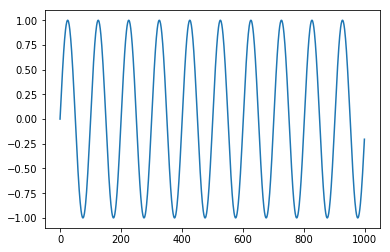

In [49]:
#main
if __name__ == '__main__':
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1, rate=44100, output=1)
    play_tone(stream)
    stream.close()
    p.terminate()

In [18]:
# 定数の生成
key_name = ["C","D","E","F","G","A","B","C+"]
key_diff = [-9,-7,-5,-4,-2,0,2,3]
key_frequency = {}
for key,diff in zip(key_name,key_diff):
    key_frequency[key] = 440 * math.pow(2,diff * (1/12.0))

In [19]:
def chord(frequency, length, rate):
    # 音源生成
    src = []
    src.append(sine(frequency,length,rate))
    src.append(sine(frequency * math.pow(2,(4/12.0)),length,rate))
    src.append(sine(frequency * math.pow(2,(7/12.0)),length,rate))
    res = numpy.array([0] * len(src[0])) #ダミーの空配列

    #加算&クリッピング
    for s in src:
        res = res + s
        res *= 0.5

    return res

In [20]:
def play_chord(stream, frequency=440, length=1, rate=44100):
    chunks = []
    chunks.append(chord(frequency, length, rate))
    chunk = numpy.concatenate(chunks) * 0.25
    stream.write(chunk.astype(numpy.float32).tostring())

In [21]:
if __name__ == '__main__':
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paFloat32, channels=1, rate=44100, output=1)
    for key in key_name:
        play_chord(stream,frequency=key_frequency[key])
    stream.close()
    p.terminate()